# Automatic Interpolation and Regridding

*Author: Creare* <br>
*Date: April 01 2020* <br>

**Keywords**: podpac, DataSource, interpolation, regridding

## Overview

Reference tutorial for evaluating a Node at arbitrary PODPAC coordinates.

### Prerequisites

- Python 2.7 or above
- [`podpac[datatype]`](https://podpac.org/install.html#install)
- *Review the [README.md](../../README.md) and [jupyter-tutorial.ipynb](../jupyter-tutorial.ipynb) for additional info on using jupyter notebooks*

### See Also

- [0-concepts/node.ipynb](../0-concepts/node.ipynb): PODPAC Node reference
- [0-concepts/coordinates.ipynb](../0-concepts/coordinates.ipynb): PODPAC Coordinates reference
- [1-reading-data/hdf5-file.ipynb](../1-reading-data/hdf5-file.ipynb): PODPAC HDF5 DataSource reference
- [1-reading-data/raster-file.ipynb](../1-reading-data/raster-file.ipynb): PODPAC Raster DataSource reference

##  Example of automatic interpolation

Once the dataset is read through PODPAC, it can be re-interpolated automatically to a different coordinate system.

The default interpolation scheme is nearest-neighbor (`nearest`). 

Let's read **a subset of the SMAP data**, using nearest-neighbor interpolation **at the resolution of the SRTM file**. 
See [1-reading-data/hdf5-file.ipynb](../1-reading-data/hdf5-file.ipynb) and [1-reading-data/raster-file.ipynb](../1-reading-data/raster-file.ipynb) for examples on how to read these data sources.

In [1]:
# plot inline
%matplotlib inline

In [2]:
import podpac

# Read the NetCDF file
# Root Zone Soil Moisture Data: https://disc.gsfc.nasa.gov/datasets/SMERGE_RZSM0_40CM_2.0/summary
filename = '../../data/raster/Smerge_Noah_CCI_L4_RZSM0_40cm_V2.0_20190510.nc4'

# Set up the PODPAC node to read this file.
node = podpac.data.H5PY(source=filename, data_key="/RZSM", time_key="/time", lat_key="/lat", lon_key="/lon", array_dims=["time", "lat", "lon"])
node

<H5PY(source='../../data/raster/Smerge_Noah_CCI_L4_RZSM0_40cm_V2.0_20190510.nc4', interpolation='nearest', data_key='/RZSM')>

In [3]:
node.coordinates

Coordinates (EPSG:4326)
	time: ArrayCoordinates1d(time): Bounds[14739.0, 14739.0], N[1]
	lat: ArrayCoordinates1d(lat): Bounds[25.0625, 52.9375], N[224]
	lon: ArrayCoordinates1d(lon): Bounds[-124.9375, -67.0625], N[464]

In [4]:
# SRTM Elevation File
srtm_filename = '../../data/raster/n39_w107_1arc_v2.tif'
srtm = podpac.data.Rasterio(source=srtm_filename)

In [5]:
srtm.coordinates

Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[38.99999999999999, 39.99999999999999], N[3601]
	lon: UniformCoordinates1d(lon): Bounds[-107.0, -106.0], N[3601]

In [6]:
# We have to provide a time coordinate, so let's combine the SRTM coordinates with the SMAP coordinates
coordinates = podpac.coordinates.merge_dims([srtm.coordinates, node.coordinates.drop(['lat', 'lon'])])
coordinates

Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[38.99999999999999, 39.99999999999999], N[3601]
	lon: UniformCoordinates1d(lon): Bounds[-107.0, -106.0], N[3601]
	time: ArrayCoordinates1d(time): Bounds[14739.0, 14739.0], N[1]

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


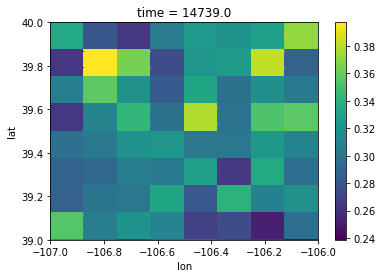

In [7]:
# evaluate the Root Zone Soil Moisture (node) at the coordinates of the elevation measurements
output = node.eval(coordinates)
output.plot()
pass